Created on Friday 08 January 2021

Group 5 - Classification

@authors : F.B

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
#os.chdir("/content/drive/My Drive/G5 Inter-Promo 2021/Données/Input")
os.chdir("/content/drive/My Drive/Colab Notebooks/projet_interpromo_2021")

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#d='Data_With_Features_Syntax.csv'
data : pd.DataFrame = pd.read_csv('train.csv', index_col=0)
data = data [['Nb_key_words', 'Nb_key_words_title', 'ratio_key_words', 'ratio_key_word_title','ratio_key_sentences']]
data.fillna('', inplace=True)
data.head()

,Nb_key_words,Nb_key_words_title,ratio_key_words,ratio_key_word_title,ratio_key_sentences
art_id,,,,,
1,0,0,0.000000,0.000000,0.000000
2,0,0,0.000000,0.000000,0.000000
25,2,0,0.002703,0.000000,0.037037
27,0,1,0.000000,0.076923,0.000000
28,0,0,0.000000,0.000000,0.000000


# Classification

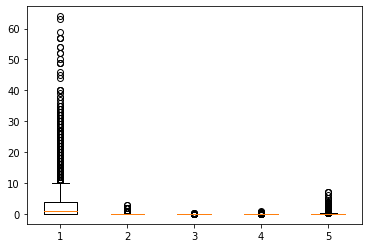

In [ ]:
plt.boxplot(data.values)
plt.show()

In [ ]:
data.describe()

,Nb_key_words,Nb_key_words_title,ratio_key_words,ratio_key_word_title,ratio_key_sentences
count,7460.000000,7460.000000,7460.000000,7460.000000,7460.000000
mean,3.001609,0.067828,0.006262,0.006243,0.121362
std,5.395399,0.271959,0.011328,0.031252,0.301026
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.002762,0.000000,0.043478
75%,4.000000,0.000000,0.007668,0.000000,0.129831
max,64.000000,3.000000,0.250000,1.000000,7.000000


In [ ]:
# Centre and reduce
data_scale = scaler.fit_transform(data)

In [ ]:
pca = PCA(n_components=3)
Xp = pca.fit_transform(data_scale)

In [ ]:
pca.explained_variance_ratio_.sum()

0.9003542142933407

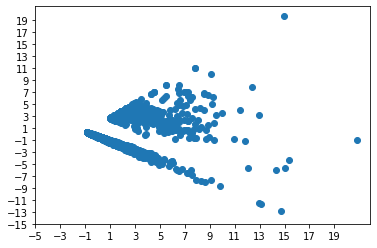

In [ ]:
plt.scatter(Xp[:,0],Xp[:,1])
plt.xticks(range(-5, 21, 2))
plt.yticks(range(-15, 21, 2))
plt.show()

In [ ]:
index_group_bottom : list = []
gb : list = []
index_group_top : list = []
gh : list = []
art_id : list = data.index.values.tolist()

for i in tqdm(range(Xp.shape[0])) :
  if Xp[i,1]>-0.95 and Xp[i,1]<9 and Xp[i,0]<10 and Xp[i,0]>=1:
    index_group_top.append(art_id[i])
    gh.append(i)
  if Xp[i,1]<=1 and Xp[i,0]<10:
    index_group_bottom.append(art_id[i])
    gb.append(i)


100%|██████████| 7460/7460 [00:00<00:00, 229045.94it/s]


In [ ]:
len(index_group_top), len(index_group_bottom)

(449, 7027)

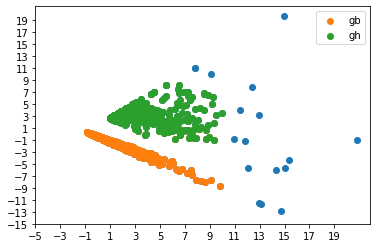

In [ ]:
plt.scatter(Xp[:,0],Xp[:,1])
plt.scatter(Xp[gb,0],Xp[gb,1], label='gb')
plt.scatter(Xp[gh,0],Xp[gh,1], label='gh')
plt.xticks(range(-5, 21, 2))
plt.yticks(range(-15, 21, 2))
plt.legend()
plt.show()

# Labeling

In [ ]:
dff = data[data['Nb_key_words']==0]
dff = dff[dff['Nb_key_words_title']==0]
len(dff)

2879

In [ ]:
art_ids = dff.index.values.tolist()

In [ ]:
len(index_group_bottom)

7027

In [ ]:
len(set(art_ids).intersection(set(index_group_bottom)))

2879

In [ ]:
data_scale = pd.DataFrame(data_scale, columns=data.columns)
data_scale.index = data.index

data_scale['label_innovation'] = -1 # unknown
data_scale.loc[index_group_bottom,'label_innovation']=0 # No innovation
data_scale.loc[index_group_top,'label_innovation']=1 # Innovation

In [ ]:
train = data_scale[data_scale['label_innovation']!=-1]
X = train[['Nb_key_words','Nb_key_words_title','ratio_key_words','ratio_key_word_title','ratio_key_sentences']].values
y = train.label_innovation.values

In [ ]:
def training(model, if_plot : bool = False)-> tuple:
  ''' This function allows you to form a model, calculate and display its confusion matrix.
      and returns its f1_score and accuracy
    Input : 
            model : model
            if_plot :
    Output :
      f1_score , accuracy
  '''
  X_train, X_val, Y_train, Y_val = train_test_split (X, y, test_size = 0.30, random_state = 40) 
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_val)

  if if_plot:
    plot_confusion_matrix(model, X_val, Y_val, cmap='Blues', normalize=None,
                     display_labels=['No innovation', 'Innovation']);

  return f1_score(Y_val, y_pred), model.score(X_val, Y_val)

(1.0, 1.0)

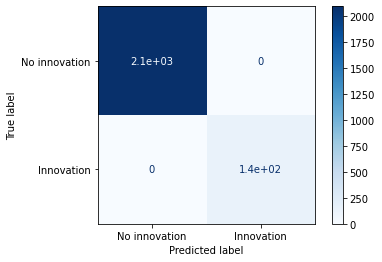

In [ ]:
# Logistic Regression 
model=LogisticRegression()
training(model, True)

(1.0, 1.0)

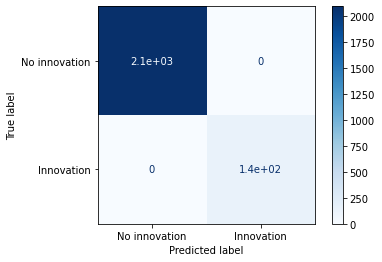

In [ ]:
# Random Forest
model=RandomForestClassifier()
training(model, True)

# Cross-validation

In [ ]:
# Random forest

print("accuracy ...")
model = RandomForestClassifier ()
print(cross_val_score(model, X, y, cv=5))

print("f1_score ...")
model = RandomForestClassifier ()
cross_val_score(model, X, y, cv=5, scoring='f1')

accuracy ...
[1. 1. 1. 1. 1.]
f1_score ...


array([1., 1., 1., 1., 1.])

In [ ]:
# Regression logistic

print("accuracy ...")
model = LogisticRegression()
print(cross_val_score(model, X, y, cv=5))

print("f1_score ...")
model = LogisticRegression()
cross_val_score(model, X, y, cv=5, scoring='f1')

accuracy ...
[1. 1. 1. 1. 1.]
f1_score ...


array([1., 1., 1., 1., 1.])

# Prediction label unknow

In [ ]:
test = data_scale [data_scale['label_innovation']==-1]
X_test = test[['Nb_key_words','Nb_key_words_title','ratio_key_words','ratio_key_word_title','ratio_key_sentences']].values

In [ ]:
# Regression logistic

model = LogisticRegression()
model.fit(X,y)
y_pred_rl= model.predict(X_test)

In [ ]:
# Random forest

model = RandomForestClassifier()
model.fit(X,y)
X_test = test[['Nb_key_words','Nb_key_words_title','ratio_key_words','ratio_key_word_title','ratio_key_sentences']].values
y_pred_rf= model.predict(X_test)

In [ ]:
print('f1_score : ', f1_score(y_pred_rf, y_pred_rl))

f1_score :  1.0


In [ ]:
z=y_pred_rf-y_pred_rl
print('accuracy :', len(z[z==0])/len(z))

accuracy : 1.0


# Output 

In [ ]:
df_pred = pd.DataFrame( y_pred_rf, columns=['label_innovation'])
df_pred.index = test.index
df_pred.head()

,label_innovation
art_id,
850,1
1330,1
1357,0
1484,0
2616,1


In [ ]:
label=train[['label_innovation']]
label=label.append(df_pred)
label.sort_index(inplace=True)
label.head()

,label_innovation
art_id,
1,0
2,0
25,0
27,1
28,0


In [ ]:
label.to_csv('/content/drive/My Drive/G5 Inter-Promo 2021/Données/Output/Innovation/g5_FB_label_pca_v1.csv', index=True)